# Import Modules and Data

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Single epoch mass estimate using single gaussian broad line models for the emission lines.
path_24 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2024_Analysis/'
conti_results_1br_24 = pd.read_csv(path_24 + 'mcmc_conti_results_1_br_gauss.csv') # Continuum parameters
line_results_1br_24 = pd.read_csv(path_24 + 'mcmc_line_results_1_br_gauss.csv') # Individual line parameters
fur_results_1br_24 = pd.read_csv(path_24 + 'mcmc_fur_results_1_br_gauss.csv') # Combined line complex parameters

path_22 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2022_Analysis/'
conti_results_1br_22 = pd.read_csv(path_22 + 'mcmc_conti_results_1_br_gauss.csv') # Continuum parameters
line_results_1br_22 = pd.read_csv(path_22 + 'mcmc_line_results_1_br_gauss.csv') # Individual line parameters
fur_results_1br_22 = pd.read_csv(path_22 + 'mcmc_fur_results_1_br_gauss.csv') # Combined line complex parameters

path_04 = '/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/2009_Analysis/'
conti_results_1br_04 = pd.read_csv(path_04 + 'mcmc_conti_results_host_sub_1_br_gauss.csv')
line_results_1br_04 = pd.read_csv(path_04 + 'mcmc_line_results_host_sub_1_br_gauss.csv')
fur_results_1br_04 = pd.read_csv(path_04 + 'mcmc_fur_results_host_sub_1_br_gauss.csv')

# Rename the line_comp column in 2004
fur_results_1br_04 = fur_results_1br_04.rename(columns={'br_line': 'line_comp'})
conti_results_1br_22

,Unnamed: 0,ra,dec,plateid,MJD,fiberid,redshift,SN_ratio_conti,Fe_uv_norm,Fe_uv_norm_err,...,qso_par_0,qso_par_1,qso_par_2,qso_par_3,qso_par_4,qso_par_5,qso_par_6,qso_par_7,qso_par_8,qso_par_9
0,0,41.43958,-3.08047,0,0,0,0.07455,89.318227,0.0,0.0,...,2913.023615,1647.195152,230.470746,14005.595651,3390.981245,-2316.707725,182.880097,35.859008,1636.144947,1407.754992


# Import and Create Combined Parameter Dataframes

In [76]:
# Function that combines the line parameters of Ha and Hb from 3 epochs into a single df
def importLineParameters(fur_results_04, fur_results_22, fur_results_24):
    # Take imported dataframes and reduce down to line_comp, fwhm, area w/ errors
    reduced_df_04 = fur_results_04.loc[fur_results_04['line_comp'].isin(['Hb', 'Ha']), ['line_comp', 'fwhm', 'fwhm_err', 'area', 'area_err']]
    reduced_df_22 = fur_results_22.loc[fur_results_22['line_comp'].isin(['Hb', 'Ha']), ['line_comp', 'fwhm', 'fwhm_err', 'area', 'area_err']]
    reduced_df_24 = fur_results_24.loc[fur_results_24['line_comp'].isin(['Hb', 'Ha']), ['line_comp', 'fwhm', 'fwhm_err', 'area', 'area_err']]
    
    # Add a year column to denote the separate epoch data
    reduced_df_04.insert(0, 'year', [2004, 2004])
    reduced_df_22.insert(0, 'year', [2022, 2022])
    reduced_df_24.insert(0, 'year', [2024, 2024])
    
    # Combine the dataframe rows for the line parameters
    combined_df = pd.concat([reduced_df_04, reduced_df_22, reduced_df_24], ignore_index=True)
    return combined_df


# Function that combines the conti parameters of L5100 flux from 3 epochs in a single df
def importContiParameters(conti_results_04, conti_results_22, conti_results_24):
    # Take continuum flux columns from original large df
    reduced_df_04 = conti_results_04[['L5100', 'L5100_err']]
    reduced_df_22 = conti_results_22[['L5100', 'L5100_err']]
    reduced_df_24 = conti_results_24[['L5100', 'L5100_err']]
    
    # Add a year column to denote the separate epoch data
    reduced_df_04.insert(0, 'year', 2004)
    reduced_df_22.insert(0, 'year', 2022)
    reduced_df_24.insert(0, 'year', 2024)
    
    # Combine the dataframes
    combined_df = pd.concat([reduced_df_04, reduced_df_22, reduced_df_24], ignore_index=True)
    return combined_df


# Create dataframes with line and conti parameters
line_params = importLineParameters(fur_results_1br_04, fur_results_1br_22, fur_results_1br_24)
conti_params = importContiParameters(conti_results_1br_04, conti_results_1br_22, conti_results_1br_24)

# Merge line and conti parameters matching the years
parameters_df = pd.merge(line_params, conti_params, on='year', how='left')
parameters_df

,year,line_comp,fwhm,fwhm_err,area,area_err,L5100,L5100_err
0,2004,Hb,7332.804314,424.319498,1252.222585,98.153442,41.934072,0.107111
1,2004,Ha,5146.579932,225.120007,1090.910669,32.919528,41.934072,0.107111
2,2022,Hb,5055.909447,231.206606,2439.798871,95.076524,42.762679,0.018098
3,2022,Ha,4449.927552,71.890732,4897.775213,104.744748,42.762679,0.018098
4,2024,Hb,4821.664202,3355.622604,7152.686669,243.214382,43.402277,0.011273
5,2024,Ha,4405.784370,78.136525,10798.523816,209.976051,43.402277,0.011273


# Calculate Luminosity from Flux

Assuming flat universe, H0 = 70 km/s/Mpc and Omega_M = 0.3

In [77]:
# Convert flux to luminosity
z = 0.07455
cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter

luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
luminosity_distance_cm  = luminosity_distance.value

# Get fluxes from parameter input
flux = parameters_df['area'].to_numpy()
flux_err = parameters_df['area_err'].to_numpy()

# Calculate luminosity from fluxes
luminosity = ((flux*10**-17) * 4 * np.pi * luminosity_distance_cm**2)
luminosity_err = ((flux_err*10**-17) * 4 * np.pi * luminosity_distance_cm**2)

# Insert luminosities back into parameter df next to the flux columns
parameters_df.insert(parameters_df.columns.get_loc('area_err') + 1, 'L', luminosity)
parameters_df.insert(parameters_df.columns.get_loc('L') + 1, 'L_err', luminosity_err)
parameters_df

,year,line_comp,fwhm,fwhm_err,area,area_err,L,L_err,L5100,L5100_err
0,2004,Hb,7332.804314,424.319498,1252.222585,98.153442,1.704021e+41,1.335669e+40,41.934072,0.107111
1,2004,Ha,5146.579932,225.120007,1090.910669,32.919528,1.484508e+41,4.479680e+39,41.934072,0.107111
2,2022,Hb,5055.909447,231.206606,2439.798871,95.076524,3.320071e+41,1.293799e+40,42.762679,0.018098
3,2022,Ha,4449.927552,71.890732,4897.775213,104.744748,6.664878e+41,1.425363e+40,42.762679,0.018098
4,2024,Hb,4821.664202,3355.622604,7152.686669,243.214382,9.733355e+41,3.309654e+40,43.402277,0.011273
5,2024,Ha,4405.784370,78.136525,10798.523816,209.976051,1.469460e+42,2.857348e+40,43.402277,0.011273


# Create Model Dependent Parameter Dataframe

M_BH = a * (L/10^b)^c * (FWHM/10^d)^e

All models can be reduced to this equation so depending on the model, it will have it's own unique values of a, b, c, d, e

In [38]:
logf = 0.683

models_array = np.array([
    # Model         A           B       C       D       E
    ['KaspiHa',     1.3e6,      42,     0.57,   3,      2.06    ], # 2005
    ['KaspiHb',     2.4e6,      42,     0.59,   3,      2       ],
    ['GreeneHa',    2e6,        42,     0.55,   3,      2.06    ], # 2005
    ['GreeneHb',    3.6e6,      42,     0.56,   3,      2       ],
    ['BontaHa',     10**7.37,   42,     0.812,  3.5,    1.387   ], # 2024
    ['BontaHb',     10**7.70,   42,     0.784,  3.5,    1.387   ], # 2020
    ['LaMassaHa',   10**0.807,  44,     0.519,  0,      2.06    ], # 2024
    ['LaMassaHb',   10**0.85,   44,     0.5,    0,      2       ],
])
models_df = pd.DataFrame(models_array, columns=['model', 'a', 'b', 'c', 'd', 'e'])
models_df

,model,a,b,c,d,e
0,KaspiHa,1300000.0,42,0.57,3,2.06
1,KaspiHb,2400000.0,42,0.59,3,2
2,GreeneHa,2000000.0,42,0.55,3,2.06
3,GreeneHb,3600000.0,42,0.56,3,2
4,BontaHa,23442288.153199226,42,0.812,3.5,1.387
5,BontaHb,50118723.36272725,42,0.784,3.5,1.387
6,LaMassaHa,6.412095765851617,44,0.519,0,2.06
7,LaMassaHb,7.079457843841379,44,0.5,0,2


# Calculate BH Mass

In [82]:
# General BH mass equation - this is equivalent to Bonta and LaMassa but may need to add those separately
def generalMassCalculation(fit_params, model_params, epoch, model, line):
    
    a, b, c, d, e = model_params.loc[model_params['model'] == model, ['a', 'b', 'c', 'd', 'e']].values[0]
    
    # Check whether the luminosity L we will be using is from the line (L) or continuum (L5100), used in LaMassa
    if model.startswith('LaMassa'):
        L_col = 'L5100'
        L_col_err = 'L5100_err'
    else:
        L_col = 'L'
        L_col_err = 'L_err'
    
    # Get line width and luminosity from dataframe
    fwhm, fwhm_err, L, L_err = fit_params.loc[(fit_params['year'] == epoch) & (fit_params['line_comp'] == line), ['fwhm', 'fwhm_err', L_col, L_col_err]]
    
    # Calculate the mass estimate
    print(a, b, c, d, e, fwhm, L)
    M = a * (L/10**b)**c * (fwhm/10**d)**e
    
    return M

mass_est =  generalMassCalculation(parameters_df, models_df, 2004, 'LaMassaHa', 'Ha')
mass_est

6.412095765851617 44 0.519 0 2.06 fwhm L5100


TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'str'

#### Read Spectroscopy Data

In [39]:
L5100_24 = 10**conti_results_1br_24['L5100'][0]
L5100_err_24 = 10**conti_results_1br_24['L5100_err'][0]
HB_fwhm_24 = 4821.664202238680
HB_fwhm_err_24 = 3355.622604379010
HA_fwhm_24 = 4405.7843703927900
HA_fwhm_err_24 = 78.13652536181870

L5100_22 = 10**conti_results_1br_22['L5100'][0]
L5100_err_22 = 10**conti_results_1br_22['L5100_err'][0]
HB_fwhm_22 = 5055.909446691620
HB_fwhm_err_22 = 231.2066055281800
HA_fwhm_22 = 4449.927551732380
HA_fwhm_err_22 = 71.89073212554650

L5100_09 = 10**conti_results_1br_09['L5100'][0]
L5100_err_09 = 10**conti_results_1br_09['L5100_err'][0]
#HB_fwhm_09 = 6612.317375 # These are using the individual HB/A_br FWHM measurements that dont have errors?
#HB_fwhm_err_09 = 
#HA_fwhm_09 = 5146.579932
#HA_fwhm_err_09 = 
HB_fwhm_09 = 7332.804313996017 # These are using the whole FWHM measurements including errors
HB_fwhm_err_09 = 424.31949820433556
HA_fwhm_09 = 5146.579931998067
HA_fwhm_err_09 = 225.12000654465555

#### Manual Spectroscopic Data Input

In [43]:
z = 0.07455

logf        = 0.683 # from DBonta* (I think) paper in Equation (21)
logf_err    = 0.03  # check in paper (taken to be unity initially)
#logf_err    = 0.150

# 2009 HB Line Parameters
fwhm_ng1_09 = 8845.62575518447 # q_mle parameter with 1 broad gaussian component - ngauss = 1
area_ng1_09 = 1228.5537947042749

fwhm_ng1_09 = 11478.343361496665 # q_mle MC = True, nsamp = 400 (was false so no errors and nsamp = 200)
fwhm_ng1_err_09 = 5717.510447308213
area_ng1_09 = 1457.7483977185866
area_ng1_err_09 = 64.89108728641679

fwhm_ng2_09 = 11478.343361496665 # q_mcmc parameter with 2 broad gaussian component - ngauss = 2 (can't force code to use 1 yet, it defaults to 2)
fwhm_ng2_err_09 = 5636.379251933966
area_ng2_09 = 1457.7483977185866
area_ng2_err_09 = 66.72866979675848

# 2022 HB Line Parameters
fwhm_ng1_22 = 5084.436178854739 # q_mle parameter with 1 broad gaussian component - ngauss = 1
area_ng1_22 = 2421.07395598318

fwhm_ng1_22 = 5053.119024788454 # q_mle MC = True, nsamp = 400 (was false so no errors and nsamp = 200)
fwhm_ng1_err_22 = 262.5802736438318
area_ng1_22 = 2378.7838906630955
area_ng1_err_22 = 122.72514493866879

fwhm_ng2_22 = 4841.674282441945 # q_mcmc parameter with 2 broad gaussian component - ngauss = 2 (can't force code to use 1 yet, it defaults to 2)
fwhm_ng2_err_22 = 299.2065304359503
area_ng2_22 = 2402.658509730434
area_ng2_err_22 = 87.76346024039844

# 2009 HA Line Parameters - Also used nsamp = 400
fwhm_Ha_09 = 5181.632829576172
fwhm_Ha_09_err = 376.5703955941167
area_Ha_09 = 1189.249765083097
area_Ha_09_err = 46.53369871724135

# 2022 HA Line Parameters
fwhm_Ha_22 = 4088.0430147108086
fwhm_Ha_22_err = 107.08500482578074
area_Ha_22 = 4843.111733252819
area_Ha_22_err = 119.1566844456388


# 2004 HB & HA Line Parameters MCMC calculated with ngauss forced to be 1 for broad component
fwhm_Hb_mcmc_09 = 9181.937198482863
fwhm_Hb_mcmc_09_err = 463.3059009728331
area_Hb_mcmc_09 = 1216.6735742170697
area_Hb_mcmc_09_err = 44.69774019982515

fwhm_Ha_mcmc_09 = 4686.505461620567
fwhm_Ha_mcmc_09_err = 98.54845941164058
area_Ha_mcmc_09 = 1293.1105846973057
area_Ha_mcmc_09_err = 32.544979572671195

# 2022 HB & HA Line Parameters MCMC calculated with ngauss forced to be 1 for broad component
fwhm_Hb_mcmc_22 = 5091.660202209681
fwhm_Hb_mcmc_22_err = 208.6893323665663
area_Hb_mcmc_22 = 2406.1029791298483
area_Hb_mcmc_22_err = 73.3487233649737

fwhm_Ha_mcmc_22 = 4462.335489029091
fwhm_Ha_mcmc_22_err = 78.4496457123314
area_Ha_mcmc_22 = 4642.740378560615
area_Ha_mcmc_22_err = 107.65180534467027

# 2023 HA Line parameters MCMC ngauss=1 br line
fwhm_Ha_mcmc_23 = 4353.101111478713
fwhm_Ha_mcmc_23_err = 63.850221030694684
area_Ha_mcmc_23 = 8476.843877524843
area_Ha_mcmc_23_err = 137.75342352633925

# 2024 HB & HA Line parameters MCMC calculated with ngauss = 1 for broad component
fwhm_Hb_mcmc_24 = 4821.664202238678
fwhm_Hb_mcmc_24_err = 2190.92666119389
area_Hb_mcmc_24 = 7152.68666896135
area_Hb_mcmc_24_err = 243.1725499243621

fwhm_Ha_mcmc_24 = 4405.7843703927865
fwhm_Ha_mcmc_24_err = 83.4780694041965
area_Ha_mcmc_24 = 10798.5238158878
area_Ha_mcmc_24_err = 205.5722304714991

#### Single Epoch Black Hole Mass Estimations

In [44]:
def Bonta20_HB_Mass(fwhm, flux, logf, z, fwhm_err=None, flux_err=None, logf_err=None):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    # Calculate mass of the black hole
    logM = logf + 7.015 + 0.784*( np.log10(L)-42 ) + 1.387*( np.log10(fwhm)-3.5 )
    # Calculate uncertainty if errors given
    if ((fwhm_err!=None) and (flux_err!=None) and (logf_err!=None)):
        L_err = ((flux_err*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
        
        # propagate errors into log-space
        logL_err = L_err / (np.log(10) * L)
        logFWHM_err = fwhm_err / (np.log(10) * fwhm)
        #print(L + L_err)
        #print(logL_err)
        #print(logFWHM_err)
        logM_err = np.sqrt( (logf_err)**2 + (0.784 * logL_err)**2 + (1.387 * logFWHM_err)**2 )
        
        return(logM, logM_err)
    
    return(logM)

def Bonta24_HA_Mass(fwhm, flux, logf, z, fwhm_err=None, flux_err=None, logf_err=None):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    # Calculate mass of the black hole
    logM = logf + 6.688 + 0.812*( np.log10(L)-42 ) + 1.634*( np.log10(fwhm)-3.5 )
    # Calculate uncertainty if errors given
    if ((fwhm_err!=None) and (flux_err!=None) and (logf_err!=None)):
        L_err = ((flux_err*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
        
        # propagate errors into log-space
        logL_err = L_err / (np.log(10) * L)
        logFWHM_err = fwhm_err / (np.log(10) * fwhm)
        #print(L + L_err)
        #print(logL_err)
        #print(logFWHM_err)
        logM_err = np.sqrt( (logf_err)**2 + (0.812 * logL_err)**2 + (1.634 * logFWHM_err)**2 )
        
        return(logM, logM_err)
    
    return(logM)


def Greene05_HA_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 2e6 * (L/1e42)**0.55 * (fwhm/1e3)**2.06
    return(M)


def Greene05_HB_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 3.6e6 * (L/1e42)**0.56 * (fwhm/1e3)**2
    
    return(M)

def Kaspi05_HA_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 1.3e6 * (L/1e42)**0.57 * (fwhm/1e3)**2.06
    
    return(M)


def Kaspi05_HB_Mass(fwhm, flux, z):
    # Convert flux to luminosity
    # Luminosity distances (cm)
    cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # Hubble const km/s/Mpc and Density param for matter
    luminosity_distance     = cosmo.luminosity_distance(z).to(u.cm)
    luminosity_distance_cm  = luminosity_distance.value
    # Calculate luminosity from fluxes
    L = ((flux*10**-17) * 4 * np.pi * (luminosity_distance_cm)**2)
    M = 2.4e6 * (L/1e42)**0.59 * (fwhm/1e3)**2
    
    return(M)


# LaMassa et al. 2024 using AGN continuum, L, driving a given line (5100 drives both HA & HB)
def lamassa_mass(L, FWHM, a, b, c, d):
    logM = a + b * np.log10(L / 10**d) + c*np.log10(FWHM) # in solar masses
    #M = 10**logM
    return logM

#### Calculate Mass from Models

In [47]:
# Using Bonta+20,24 for Hb, Ha respectively
logM_Hb_09_mcmc_bonta, logM_Hb_09_mcmc_bonta_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, logf, z, fwhm_Hb_mcmc_09_err, area_Hb_mcmc_09_err, logf_err) # mcmc ngauss = 1 (hard coded)
logM_Hb_22_mcmc_bonta, logM_Hb_22_mcmc_bonta_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, logf, z, fwhm_Hb_mcmc_22_err, area_Hb_mcmc_22_err, logf_err)
logM_Hb_24_mcmc_bonta, logM_Hb_24_mcmc_bonta_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_24, area_Hb_mcmc_24, logf, z, fwhm_Hb_mcmc_24_err, area_Hb_mcmc_24_err, logf_err)

logM_Ha_09_mcmc_bonta, logM_Ha_09_mcmc_bonta_err = Bonta24_HA_Mass(fwhm_Hb_mcmc_09, area_Ha_mcmc_09, logf, z, fwhm_Ha_mcmc_09_err, area_Ha_mcmc_09_err, logf_err) # mcmc ngauss = 1 (hard coded)
logM_Ha_22_mcmc_bonta, logM_Ha_22_mcmc_bonta_err = Bonta24_HA_Mass(fwhm_Hb_mcmc_22, area_Ha_mcmc_22, logf, z, fwhm_Ha_mcmc_22_err, area_Ha_mcmc_22_err, logf_err)
logM_Ha_24_mcmc_bonta, logM_Ha_24_mcmc_bonta_err = Bonta24_HA_Mass(fwhm_Hb_mcmc_24, area_Ha_mcmc_24, logf, z, fwhm_Ha_mcmc_24_err, area_Ha_mcmc_24_err, logf_err)

# Using Greene 2005 BH Mass estimation using both Ha and Hb
M_Ha_09_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Ha_23_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_23, area_Ha_mcmc_23, z)
M_Ha_24_mcmc_greene = Greene05_HA_Mass(fwhm_Ha_mcmc_24, area_Ha_mcmc_24, z)
M_Hb_09_mcmc_greene = Greene05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc_greene = Greene05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)
M_Hb_24_mcmc_greene = Greene05_HB_Mass(fwhm_Hb_mcmc_24, area_Hb_mcmc_24, z)


# Using Kaspi 2005 (similar to Greene 2005)
M_Ha_09_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Ha_23_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_23, area_Ha_mcmc_23, z)
M_Ha_24_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_24, area_Ha_mcmc_24, z)
M_Hb_09_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)
M_Hb_24_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_24, area_Hb_mcmc_24, z)

# Using LaMassa 2024 HB and HA FWHM measurements with L5100 continuum luminosity
logM_HB_lamassa24_24 = lamassa_mass(L5100_24, HB_fwhm_24, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_24 = lamassa_mass(L5100_24, HA_fwhm_24, 0.807, 0.519, 2.06, 44)
logM_HB_lamassa24_22 = lamassa_mass(L5100_22, HB_fwhm_22, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_22 = lamassa_mass(L5100_22, HA_fwhm_22, 0.807, 0.519, 2.06, 44)
logM_HB_lamassa24_09 = lamassa_mass(L5100_09, HB_fwhm_09, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_09 = lamassa_mass(L5100_09, HA_fwhm_09, 0.807, 0.519, 2.06, 44)

print('a) B20 HB Mass MCMC Fit 2009: ' + "{:.3e}".format(10**logM_Hb_09_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Hb_09_mcmc_bonta * np.log(10)) * logM_Hb_09_mcmc_bonta_err) + " M_sun")
print('b) B20 HB Mass MCMC Fit 2022: ' + "{:.3e}".format(10**logM_Hb_22_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Hb_22_mcmc_bonta * np.log(10)) * logM_Hb_22_mcmc_bonta_err) + " M_sun")
print("c) G05 HB Mass 2009: " + "{:.3e}".format(M_Hb_09_mcmc_greene)+ " M_sun")
print("d) G05 HB Mass 2022: " + "{:.3e}".format(M_Hb_22_mcmc_greene)+ " M_sun")
print("e) G05 HA Mass 2009: " + "{:.3e}".format(M_Ha_09_mcmc_greene)+ " M_sun")
print("f) G05 HA Mass 2022: " + "{:.3e}".format(M_Ha_22_mcmc_greene)+ " M_sun")
print("g) K05 HB Mass 2009: " + "{:.3e}".format(M_Hb_09_mcmc_kaspi)+ " M_sun")
print("h) K05 HB Mass 2022: " + "{:.3e}".format(M_Hb_22_mcmc_kaspi)+ " M_sun")
print("i) K05 HA Mass 2009: " + "{:.3e}".format(M_Ha_09_mcmc_kaspi)+ " M_sun")
print("j) K05 HA Mass 2022: " + "{:.3e}".format(M_Ha_22_mcmc_kaspi)+ " M_sun")
print("k) L24 HB Mass 2009: " + "{:.3e}".format(10**logM_HB_lamassa24_09) + " M_sun")
print("l) L24 HB Mass 2022: " + "{:.3e}".format(10**logM_HB_lamassa24_22) + " M_sun")
print("m) L24 HA Mass 2009: " + "{:.3e}".format(10**logM_HA_lamassa24_09) + " M_sun")
print("n) L24 HA Mass 2022: " + "{:.3e}".format(10**logM_HA_lamassa24_22) + " M_sun")
print('o) B20 HB Mass MCMC Fit 2024: ' + "{:.3e}".format(10**logM_Hb_24_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Hb_24_mcmc_bonta * np.log(10)) * logM_Hb_24_mcmc_bonta_err) + " M_sun")
print("p) G05 HB Mass 2024: " + "{:.3e}".format(M_Hb_24_mcmc_greene)+ " M_sun")
print("q) G05 HA Mass 2024: " + "{:.3e}".format(M_Ha_24_mcmc_greene)+ " M_sun")
print("r) K05 HB Mass 2024: " + "{:.3e}".format(M_Hb_24_mcmc_kaspi)+ " M_sun")
print("s) K05 HA Mass 2024: " + "{:.3e}".format(M_Ha_24_mcmc_kaspi)+ " M_sun")
print("t) G05 HA Mass 2023: " + "{:.3e}".format(M_Ha_23_mcmc_greene)+ " M_sun")
print("u) K05 HA Mass 2023: " + "{:.3e}".format(M_Ha_23_mcmc_kaspi)+ " M_sun")
print("v) L24 HB Mass 2024: " + "{:.3e}".format(10**logM_HB_lamassa24_24) + " M_sun")
print("w) L24 HA Mass 2024: " + "{:.3e}".format(10**logM_HA_lamassa24_24) + " M_sun")
print('x) B24 HA Mass MCMC Fit 2009: ' + "{:.3e}".format(10**logM_Ha_09_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Ha_09_mcmc_bonta * np.log(10)) * logM_Ha_09_mcmc_bonta_err) + " M_sun")
print('y) B24 HA Mass MCMC Fit 2022: ' + "{:.3e}".format(10**logM_Ha_22_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Ha_22_mcmc_bonta * np.log(10)) * logM_Ha_22_mcmc_bonta_err) + " M_sun")
print('z) B24 HA Mass MCMC Fit 2024: ' + "{:.3e}".format(10**logM_Ha_24_mcmc_bonta) + ' +- ' + "{:.3e}".format((10**logM_Ha_24_mcmc_bonta * np.log(10)) * logM_Ha_24_mcmc_bonta_err) + " M_sun")

a) B20 HB Mass MCMC Fit 2009: 5.343e+07 +- 5.474e+06 M_sun
b) B20 HB Mass MCMC Fit 2022: 4.025e+07 +- 3.727e+06 M_sun
c) G05 HB Mass 2009: 1.109e+08 M_sun
d) G05 HB Mass 2022: 4.994e+07 M_sun
e) G05 HA Mass 2009: 1.853e+07 M_sun
f) G05 HA Mass 2022: 3.384e+07 M_sun
g) K05 HB Mass 2009: 7.003e+07 M_sun
h) K05 HB Mass 2022: 3.220e+07 M_sun
i) K05 HA Mass 2009: 1.164e+07 M_sun
j) K05 HA Mass 2022: 2.180e+07 M_sun
k) L24 HB Mass 2009: 3.528e+07 M_sun
l) L24 HB Mass 2022: 4.354e+07 M_sun
m) L24 HA Mass 2009: 2.402e+07 M_sun
n) L24 HA Mass 2022: 4.791e+07 M_sun
o) B20 HB Mass MCMC Fit 2024: 8.768e+07 +- 5.564e+07 M_sun
p) G05 HB Mass 2024: 8.244e+07 M_sun
q) G05 HA Mass 2024: 5.244e+07 M_sun
r) K05 HB Mass 2024: 5.491e+07 M_sun
s) K05 HA Mass 2024: 3.435e+07 M_sun
t) G05 HA Mass 2023: 4.478e+07 M_sun
u) K05 HA Mass 2023: 2.919e+07 M_sun
v) L24 HB Mass 2024: 8.271e+07 M_sun
w) L24 HA Mass 2024: 1.008e+08 M_sun
x) B24 HA Mass MCMC Fit 2009: 3.271e+07 +- 2.425e+06 M_sun
y) B24 HA Mass MCMC Fit 

#### Monte Carlo Sampling to Obtain Errors

In [6]:
def MassMCSample(model, N, fwhm, fwhm_err, flux, flux_err):
    z = 0.07455
    sample_result = np.zeros(N, dtype=float) # create array to store results
    # Use specified model
    if model == 'Bonta':
        logf = 0.683 # from paper in Equation (21)
        logf_err = 0.03  # check in paper (taken to be unity initially)
        
        fwhm_sample = np.random.normal(fwhm, fwhm_err, N)
        flux_sample = np.random.normal(flux, flux_err, N)
        
        mass_sample = Bonta20_HB_Mass(fwhm_sample, flux_sample, logf, z)
    
    return np.mean(mass_sample), np.std(mass_sample)


'''
logM_09_mcmc, logM_09_mcmc_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, logf, z, fwhm_Hb_mcmc_09_err, area_Hb_mcmc_09_err, logf_err) # mcmc ngauss = 1 (hard coded)
logM_22_mcmc, logM_22_mcmc_err = Bonta20_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, logf, z, fwhm_Hb_mcmc_22_err, area_Hb_mcmc_22_err, logf_err)

# Using Greene 2005 BH Mass estimation using both Ha and Hb
M_Ha_09_mcmc = Greene05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc = Greene05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Hb_09_mcmc = Greene05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc = Greene05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)

# Using Kaspi 2005 (similar to Greene 2005)
M_Ha_09_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_09, area_Ha_mcmc_09, z) # mcmc ngauss = 1 (hard coded)
M_Ha_22_mcmc_kaspi = Kaspi05_HA_Mass(fwhm_Ha_mcmc_22, area_Ha_mcmc_22, z)
M_Hb_09_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_09, area_Hb_mcmc_09, z)
M_Hb_22_mcmc_kaspi = Kaspi05_HB_Mass(fwhm_Hb_mcmc_22, area_Hb_mcmc_22, z)

# Using LaMassa 2024 HB and HA FWHM measurements with L5100 continuum luminosity
logM_HB_lamassa24_22 = lamassa_mass(L5100_22, HB_fwhm_22, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_22 = lamassa_mass(L5100_22, HA_fwhm_22, 0.807, 0.519, 2.06, 44)
logM_HB_lamassa24_09 = lamassa_mass(L5100_09, HB_fwhm_09, 0.85, 0.5, 2, 44)
logM_HA_lamassa24_09 = lamassa_mass(L5100_09, HA_fwhm_09, 0.807, 0.519, 2.06, 44)
'''
B20_HB_09_MC, B20_HB_09_MC_err = MassMCSample('Bonta', 100, fwhm_Hb_mcmc_09, fwhm_Hb_mcmc_09_err, area_Hb_mcmc_09, area_Hb_mcmc_09_err)
10**B20_HB_09_MC_err

1.058378214737986

#### Plot Results

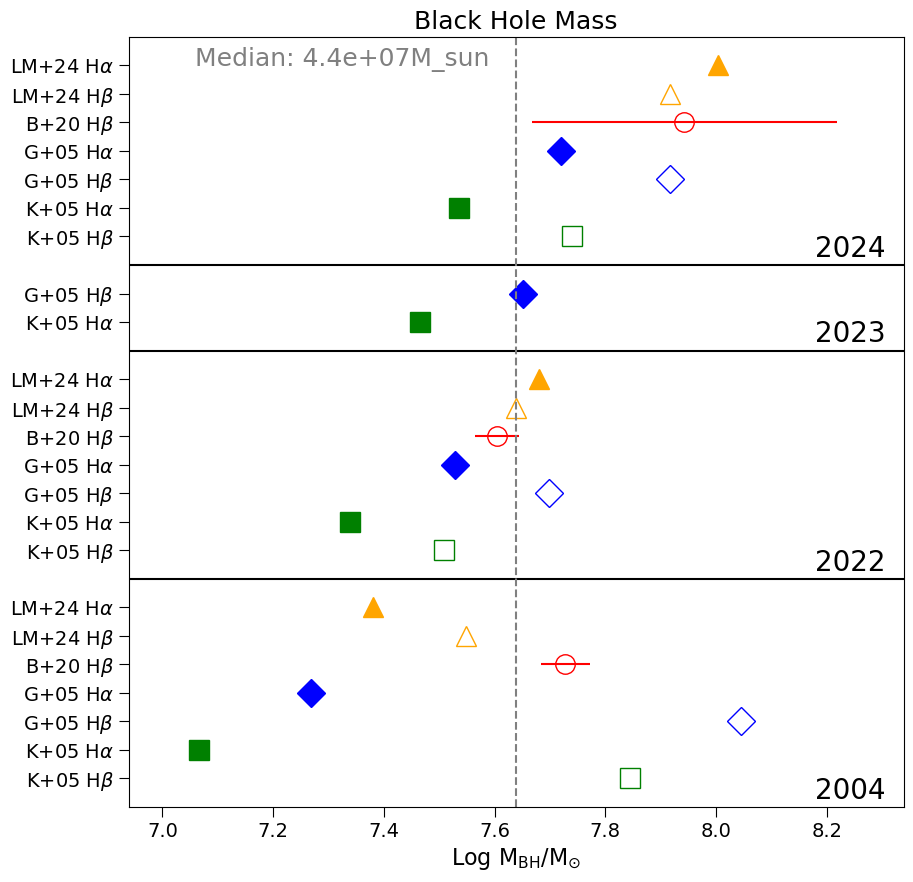

In [17]:
# Plot range of BH masses to compare to C. Bertemes et al. 2024
plt.figure(figsize=(10, 10))

plt.plot(logM_HA_lamassa24_24, 27, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_24, 26, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_24_mcmc_bonta, 25, xerr=logM_24_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_24_mcmc_greene), 24, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_24_mcmc_greene), 23, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_24_mcmc_kaspi), 22, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_24_mcmc_kaspi), 21, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(20, linestyle='-', color='black')

plt.plot(np.log10(M_Ha_23_mcmc_greene), 19, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_23_mcmc_kaspi), 18, marker='s', markersize=14, color='green')

plt.axhline(17, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_22, 16, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_22, 15, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_22_mcmc_bonta, 14, xerr=logM_22_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_22_mcmc_greene), 13, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_22_mcmc_greene), 12, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_22_mcmc_kaspi), 11, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_22_mcmc_kaspi), 10, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(9, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_09, 8, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_09, 7, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_09_mcmc_bonta, 6, xerr=logM_09_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_09_mcmc_greene), 5, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_09_mcmc_greene), 4, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_09_mcmc_kaspi), 3, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_09_mcmc_kaspi), 2, marker='s', fillstyle='none', markersize=14, color='green')

med = np.median([logM_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), np.log10(M_Ha_23_mcmc_greene), np.log10(M_Ha_23_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi), logM_HA_lamassa24_09, logM_HB_lamassa24_09, logM_09_mcmc_bonta, np.log10(M_Ha_09_mcmc_greene), np.log10(M_Hb_09_mcmc_greene), np.log10(M_Ha_09_mcmc_kaspi), np.log10(M_Hb_09_mcmc_kaspi)])
plt.axvline(med, color='grey', linestyle='--')
plt.text(med-0.58, 27, 'Median: '+str("{:.1e}".format(10**med) + r'M_sun'), fontsize=18, color='grey')
plt.text(med+0.54, 20.3, '2024', color='black', fontsize=20)
plt.text(med+0.54, 17.3, '2023', color='black', fontsize=20)
plt.text(med+0.54, 9.3, '2022', color='black', fontsize=20)
plt.text(med+0.54, 1.3, '2004', color='black', fontsize=20)

plt.ylim(1, 28)
plt.xlim(med-0.7, med+0.7)

plt.title('Black Hole Mass', fontsize=18)
#plt.yticks(ticks=[14,13,12,11,10,9,8,7,6,5,4,3,2,1], labels=[r'LaMassa+24 H$\beta$ 2009', r'LaMassa+24 H$\beta$ 2022', r'LaMassa+24 H$\alpha$ 2009', r'LaMassa+24 H$\alpha$ 2022', r'Bonta+20 H$\beta$ 2009', r'Bonta+20 H$\beta$ 2022', r'Greene+05 H$\beta$ 2009', r'Greene+05 H$\beta$ 2022', r'Greene+05 H$\alpha$ 2009', r'Greene+05 H$\alpha$ 2022', r'Kaspi+05 H$\beta$ 2009', r'Kaspi+05 H$\beta$ 2022', r'Kaspi+05 H$\alpha$ 2009', r'Kaspi+05 H$\alpha$ 2022'], fontsize=14)
plt.yticks(ticks=[27,26,25,24,23,22,21, 19,18, 16,15,14,13,12,11,10, 8,7,6,5,4,3,2], labels=[r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$'], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel(r'Log M$_{\text{BH}} / $M$_{\odot}$', fontsize=16)
plt.tick_params(length=7)

#plt.legend()
plt.savefig('/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/BHMassComplete.png')
plt.show()

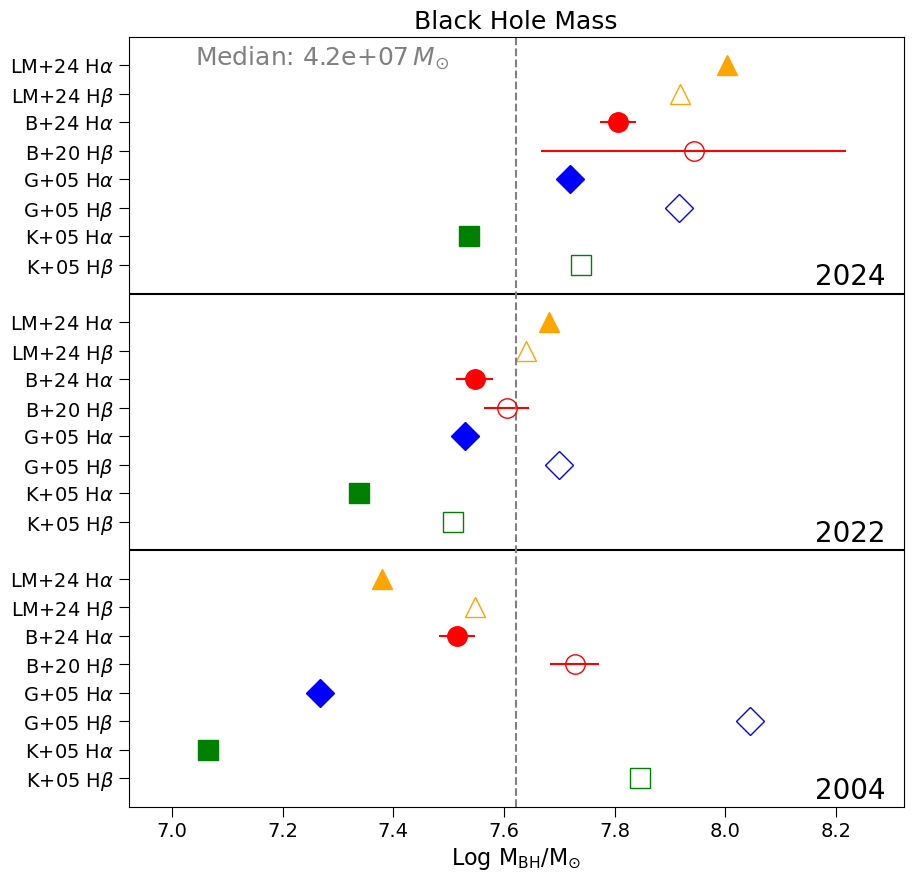

In [55]:
# Plot range of BH masses to compare to C. Bertemes et al. 2024
plt.figure(figsize=(10, 10))

plt.plot(logM_HA_lamassa24_24, 27, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_24, 26, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_Ha_24_mcmc_bonta, 25, xerr=logM_Ha_24_mcmc_bonta_err, marker='o', markersize=14, color='red')
plt.errorbar(logM_Hb_24_mcmc_bonta, 24, xerr=logM_Hb_24_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_24_mcmc_greene), 23, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_24_mcmc_greene), 22, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_24_mcmc_kaspi), 21, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_24_mcmc_kaspi), 20, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(19, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_22, 18, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_22, 17, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_Ha_22_mcmc_bonta, 16, xerr=logM_Ha_22_mcmc_bonta_err, marker='o', markersize=14, color='red')
plt.errorbar(logM_Hb_22_mcmc_bonta, 15, xerr=logM_Hb_22_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_22_mcmc_greene), 14, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_22_mcmc_greene), 13, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_22_mcmc_kaspi), 12, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_22_mcmc_kaspi), 11, marker='s', fillstyle='none', markersize=14, color='green')

plt.axhline(10, linestyle='-', color='black')

plt.plot(logM_HA_lamassa24_09, 9, marker='^', markersize=14, color='orange')
plt.plot(logM_HB_lamassa24_09, 8, marker='^', fillstyle='none', markersize=14, color='orange')
plt.errorbar(logM_Ha_09_mcmc_bonta, 7, xerr=logM_Ha_09_mcmc_bonta_err, marker='o', markersize=14, color='red')
plt.errorbar(logM_Hb_09_mcmc_bonta, 6, xerr=logM_Hb_09_mcmc_bonta_err, fillstyle='none', marker='o', markersize=14, color='red')
plt.plot(np.log10(M_Ha_09_mcmc_greene), 5, marker='D', markersize=14, color='blue')
plt.plot(np.log10(M_Hb_09_mcmc_greene), 4, marker='D', fillstyle='none', markersize=14, color='blue')
plt.plot(np.log10(M_Ha_09_mcmc_kaspi), 3, marker='s', markersize=14, color='green')
plt.plot(np.log10(M_Hb_09_mcmc_kaspi), 2, marker='s', fillstyle='none', markersize=14, color='green')

med = np.median([logM_Hb_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_Hb_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi), logM_HA_lamassa24_09, logM_HB_lamassa24_09, logM_Hb_09_mcmc_bonta, np.log10(M_Ha_09_mcmc_greene), np.log10(M_Hb_09_mcmc_greene), np.log10(M_Ha_09_mcmc_kaspi), np.log10(M_Hb_09_mcmc_kaspi), logM_Ha_09_mcmc_bonta, logM_Ha_22_mcmc_bonta, logM_Ha_24_mcmc_bonta])
plt.axvline(med, color='grey', linestyle='--')
#plt.text(med-0.58, 27, 'Median: '+str("{:.1e}".format(10**med) + r'M_sun'), fontsize=18, color='grey')
plt.text(med-0.58, 27, 'Median: '+str("{:.1e}".format(10**med) + r'$\, M_{\odot}$'), fontsize=18, color='grey')
plt.text(med+0.54, 19.3, '2024', color='black', fontsize=20)
plt.text(med+0.54, 10.3, '2022', color='black', fontsize=20)
plt.text(med+0.54, 1.3, '2004', color='black', fontsize=20)

plt.ylim(1, 28)
plt.xlim(med-0.7, med+0.7)

plt.title('Black Hole Mass', fontsize=18)
#plt.yticks(ticks=[14,13,12,11,10,9,8,7,6,5,4,3,2,1], labels=[r'LaMassa+24 H$\beta$ 2009', r'LaMassa+24 H$\beta$ 2022', r'LaMassa+24 H$\alpha$ 2009', r'LaMassa+24 H$\alpha$ 2022', r'Bonta+20 H$\beta$ 2009', r'Bonta+20 H$\beta$ 2022', r'Greene+05 H$\beta$ 2009', r'Greene+05 H$\beta$ 2022', r'Greene+05 H$\alpha$ 2009', r'Greene+05 H$\alpha$ 2022', r'Kaspi+05 H$\beta$ 2009', r'Kaspi+05 H$\beta$ 2022', r'Kaspi+05 H$\alpha$ 2009', r'Kaspi+05 H$\alpha$ 2022'], fontsize=14)
plt.yticks(ticks=[27,26,25,24,23,22,21,20, 18,17,16,15,14,13,12,11, 9,8,7,6,5,4,3,2], 
           labels=[r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+24 H$\alpha$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', \
                   r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+24 H$\alpha$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$', \
                   r'LM+24 H$\alpha$', r'LM+24 H$\beta$', r'B+24 H$\alpha$', r'B+20 H$\beta$', r'G+05 H$\alpha$', r'G+05 H$\beta$', r'K+05 H$\alpha$', r'K+05 H$\beta$'], fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel(r'Log M$_{\text{BH}} / $M$_{\odot}$', fontsize=16)
plt.tick_params(length=7)

#plt.legend()
plt.savefig('/Users/joel/Library/CloudStorage/OneDrive-UniversityofSouthampton/Post Grad/ZTF18abuamgo_CLAGN_Project/MyPlots/BHMassComplete.png')
plt.show()

# Black Hole Mass Estimate Averages

In [12]:
# Median BH mass without 2023
med = np.median([logM_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi), logM_HA_lamassa24_09, logM_HB_lamassa24_09, logM_09_mcmc_bonta, np.log10(M_Ha_09_mcmc_greene), np.log10(M_Hb_09_mcmc_greene), np.log10(M_Ha_09_mcmc_kaspi), np.log10(M_Hb_09_mcmc_kaspi)])

# Median BH mass using 2022 & 2024
med_best = np.median([logM_24_mcmc_bonta, np.log10(M_Ha_24_mcmc_greene), np.log10(M_Hb_24_mcmc_greene), np.log10(M_Ha_24_mcmc_kaspi), np.log10(M_Hb_24_mcmc_kaspi), logM_HA_lamassa24_22, logM_HB_lamassa24_22, logM_22_mcmc_bonta, np.log10(M_Ha_22_mcmc_greene), np.log10(M_Hb_22_mcmc_greene), np.log10(M_Ha_22_mcmc_kaspi), np.log10(M_Hb_22_mcmc_kaspi)])

#med_09 = np.median([logM_HB_lamassa24_09, logM_HA_lamassa24_09, logM_09_mcmc, np.log10(M_Hb_09_mcmc), np.log10(M_Ha_09_mcmc), np.log10(M_Hb_09_mcmc_kaspi), np.log10(M_Ha_09_mcmc_kaspi)])
#med_22 = np.median([logM_HB_lamassa24_22, logM_HA_lamassa24_22, logM_22_mcmc, np.log10(M_Hb_22_mcmc), np.log10(M_Ha_22_mcmc), np.log10(M_Hb_22_mcmc_kaspi), np.log10(M_Ha_22_mcmc_kaspi)])

# HA line profiles are the strongest (especially for 2009) so most reliable
#med_HA_09 = np.median([logM_HA_lamassa24_09, np.log10(M_Ha_09_mcmc), np.log10(M_Ha_09_mcmc_kaspi)])
#med_HA_22 = np.median([logM_HA_lamassa24_22, np.log10(M_Ha_22_mcmc), np.log10(M_Ha_22_mcmc_kaspi)])

print('Median: '  + "{:.3e}".format(10**med)+ " M_sun")
print(med)

print('')
print('Using only 2022 and 2024')
print('Median: '  + "{:.3e}".format(10**med_best)+ " M_sun")
print(med_best)
#print('Median of 2009: '  + "{:.3e}".format(10**med_09)+ " M_sun")
#print('Median of 2022: '  + "{:.3e}".format(10**med_22)+ " M_sun")
#print('Median of 2009 from HA: '  + "{:.3e}".format(10**med_HA_09)+ " M_sun")
#print('Median of 2022 from HA: '  + "{:.3e}".format(10**med_HA_22)+ " M_sun")

Median: 4.354e+07 M_sun
7.638937846159444

Using only 2022 and 2024
Median: 4.568e+07 M_sun
7.659687533970935


In [44]:
2+1+3+4+3+1+6

20